# <div style="text-align: center; background-color: white; font-family:Times New Roman; color: #DEBCA2; padding: 14px; line-height: 1;border-radius:20px"> **Cerealytics: The Sweet Science of Data Analysis**</div>

# <div style="text-align: center; background-color: #DEBCA2; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px"> Data Pre-Processsing</div>

In [2]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/80-cereals/cereal.csv


In [3]:
filepath = '/kaggle/input/80-cereals/cereal.csv'
cereals = pd.read_csv(filepath)

In [4]:
# Summary statistics
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
print("Dataset Columns and rows:", cereals.shape)
print("Dataset size:", cereals.size)

Dataset Columns and rows: (77, 16)
Dataset size: 1232


In [6]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
# Checking for missing data
cereals.isnull().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [8]:
# Checking for duplicated values
cereals.duplicated().any()

False

In [9]:
# Renaming coloumn names
cereals = cereals.rename(columns={"mfr": "manufacturer", "type": "serving_type", "potass":"potassium", 'carbo': 'carbohydrates'})

manufacturers = {
    'A' : 'American Home Food Products',
    'G' : 'General Mills',
    'K' : 'Kelloggs',
    'N' : 'Nabisco',
    'P' : 'Post',
    'Q' : 'Quaker Oats',
    'R' : 'Ralston Purina',
 }
serving_types = {
    'C': 'cold',
    'H': 'hot',
}

def change_observation_values(df,list_items,column_name):
    for index, value in list_items.items():
        df.loc[df[column_name] == index, column_name] = value
    return df

cereals = change_observation_values(cereals,manufacturers,'manufacturer')

cereals = change_observation_values(cereals,serving_types,'serving_type')

In [10]:
cereals.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# <div style="text-align: center; background-color: #DEBCA2; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">Exploratory Data Analysis</div>

In [11]:
# Required functions
def get_observations(df,column):
    
    return pd.Series(df[column]).drop_duplicates().to_list()

def count_observations(list_series,df,column):
    
    return_this = []

    for s in list_series:
        return_this.append( df[column].str.count(s).sum() )
    return return_this

df = cereals.copy()

> **Number of Cereal Products per Manufacturer**

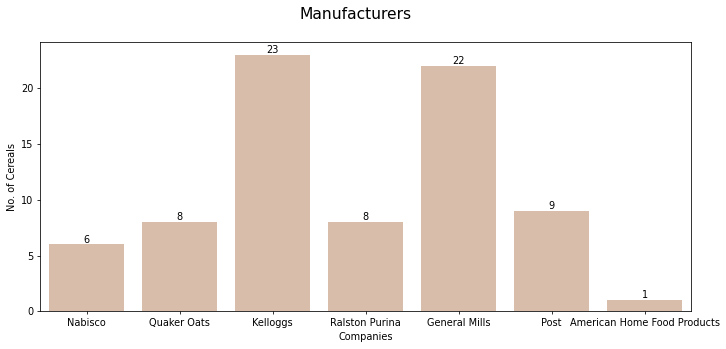

In [39]:
companies = get_observations(df,'manufacturer')
product_count = count_observations(companies,df,'manufacturer')

fig = plt.figure(figsize=(12,5), dpi=70)
fig.suptitle('Manufacturers',fontsize=16)
plots = sns.barplot(y = product_count,x = companies, color='#DEBCA2')
plt.xlabel('Companies')
plt.ylabel('No. of Cereals')

for i, v in enumerate(product_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

> **Top 5 highest rating cereals**

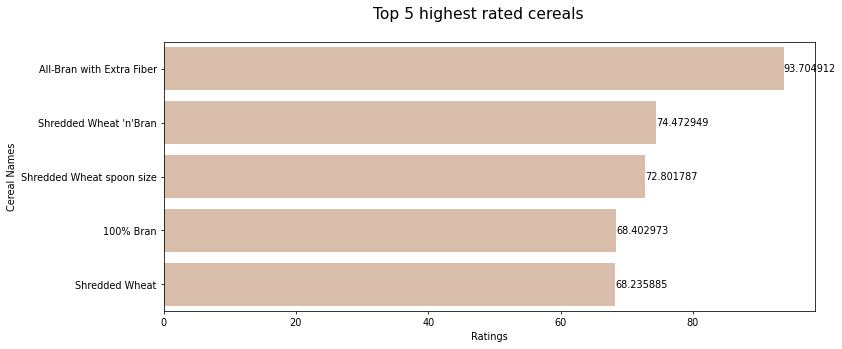

In [38]:
df_top_rating = df.sort_values('rating', ascending=False)
df_top_rating = df_top_rating.head(5)

fig = plt.figure(figsize=(12,5), dpi=70)
fig.suptitle('Top 5 highest rated cereals',fontsize=16)
plots = sns.barplot(y = df_top_rating['name'],x = df_top_rating['rating'], color='#DEBCA2')
plt.xlabel('Ratings')
plt.ylabel('Cereal Names')

for i, v in enumerate(df_top_rating['rating']):
    plt.text(v, i, str(v), ha='left', va='center')

>**Top 5 lowest rating cereals**

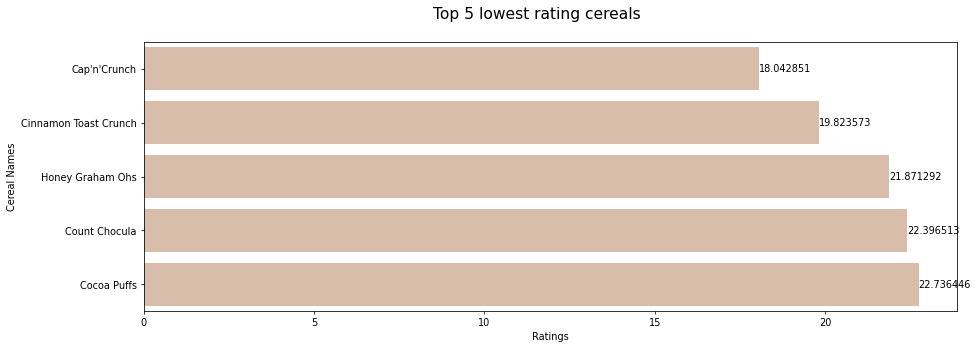

In [37]:
low_ratings = df.sort_values('rating', ascending=True)
low_rating_5 = low_ratings.head(5)

fig = plt.figure(figsize=(15,5), dpi=70)
fig.suptitle('Top 5 lowest rating cereals',fontsize=16)
plots = sns.barplot(y = low_rating_5['name'],x = low_rating_5['rating'], color='#DEBCA2')
plt.xlabel('Ratings')
plt.ylabel('Cereal Names')

for i, v in enumerate(low_rating_5['rating']):
    plt.text(v, i, str(v), ha='left', va='center')

>**Serving types of the cereal**

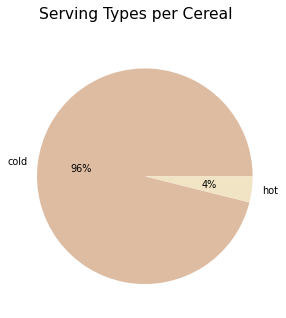

In [36]:
servings = get_observations(df,'serving_type')
servings_count = count_observations(servings,df,'serving_type')

#create pie chart
fig = plt.figure(figsize=(10,5), dpi=70)
colors = ['#DEBCA2', '#F0E4C4']
fig.suptitle('Serving Types per Cereal',fontsize=16)
plt.pie(servings_count, labels = servings, colors = colors, autopct='%.0f%%')
plt.show()

>**Number of Cereals per shelf**

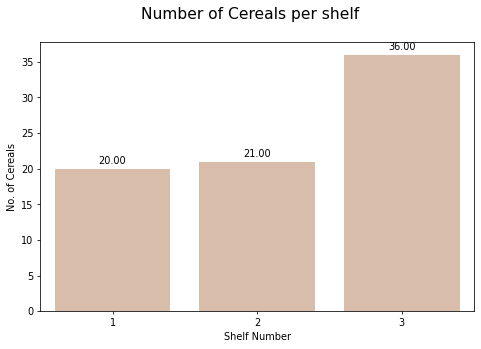

In [33]:
_s = df['shelf'].value_counts()
shelves = _s.index
shelves_count = _s

fig = plt.figure(figsize=(8,5), dpi=70)
fig.suptitle('Number of Cereals per shelf',fontsize=16)
plots = sns.barplot(y = shelves_count,x = shelves, color='#DEBCA2')
plt.xlabel('Shelf Number')
plt.ylabel('No. of Cereals')

for bar in plots.patches:
    
    plots.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), 
        ha='center', 
        va='center',
        size=10, 
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.show()

>**Overall distribution of each attribute**

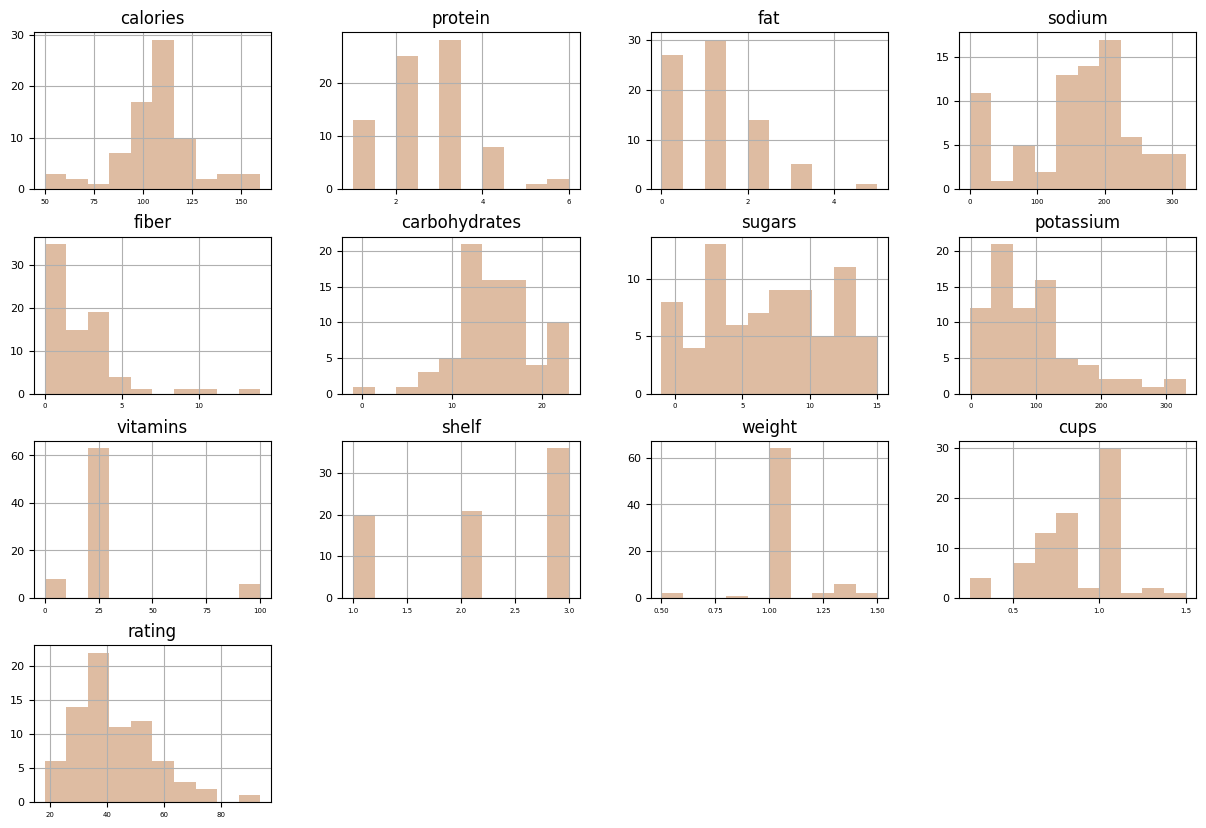

In [40]:
# Presence of outliers
df.hist(figsize=(15, 10), bins=10, xlabelsize=5, ylabelsize=8, color='#DEBCA2');

# <div style="text-align: center; background-color: #DEBCA2; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">Data Visualization & Analysis </div>

**What are the most influential features that contribute to the ratings of cereals in the 80 Cereals dataset?**

> **Evaluating Linear Relationships between Features and Ratings using the Pearson Correlation Method**

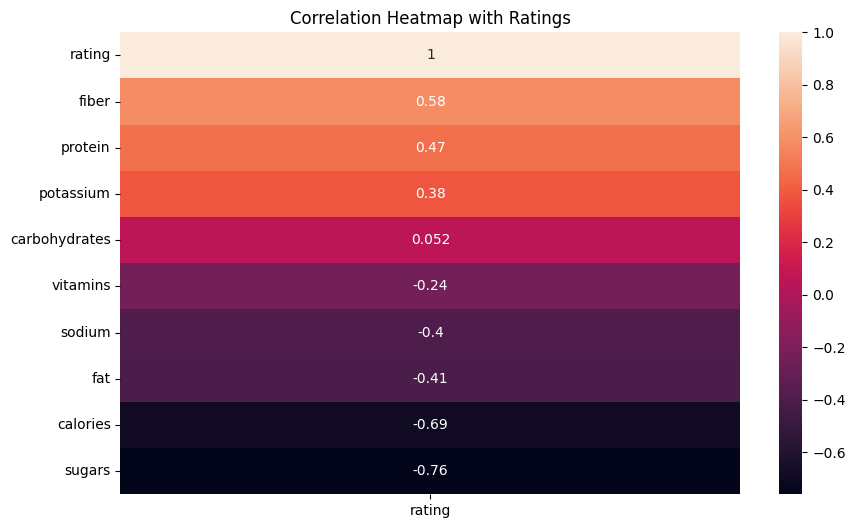

In [42]:
# Exclude non-numeric columns ('name') from the dataframe
numeric_columns = cereals.drop(columns=['name', 'serving_type', 'manufacturer','shelf', 'cups', 'weight'])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr(method = 'pearson')

# Create a heatmap for correlation with 'rating'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True)
plt.title("Correlation Heatmap with Ratings")
plt.show()

**Insight:**
 
> * Fiber, protein, potassium, and carbohydrates exhibit a positive linear relationship with ratings. 
> 
> * Conversely, vitamins, sodium, fat, calories, and sugars display a negative linear relationship with ratings. 
> 
> * This suggests that consumers tend to favor cereals with lower calorie, fat, and sugar content, while showing a preference for those rich in fiber, protein, potassium, and carbohydrates.

**Fiber stands out with the highest positive linear score, indicating that consumers have strong inclination toward cereals with higher fiber content**

<Axes: title={'center': 'Relationship between Fiber and Rating'}, xlabel='fiber', ylabel='rating'>

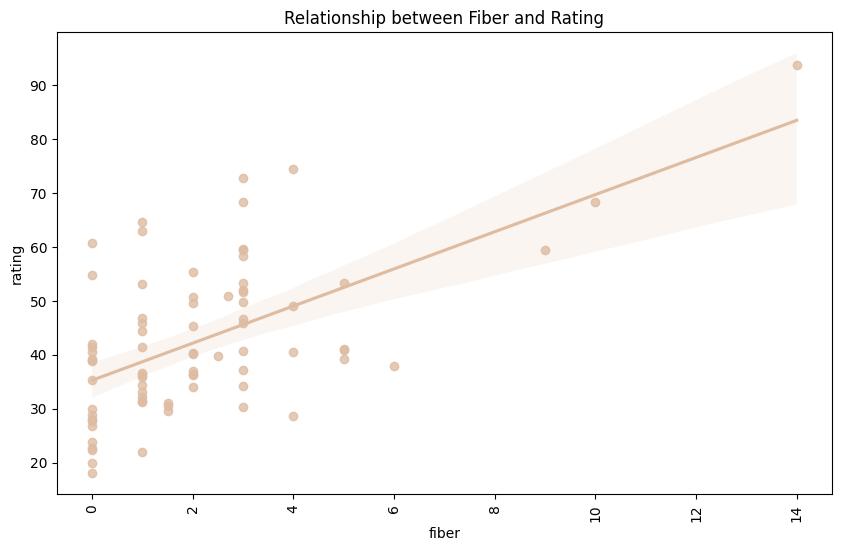

In [43]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Fiber and Rating')
plt.xticks(rotation=90)
sns.regplot(data=cereals, x=cereals['fiber'], y=cereals['rating'], color='#DEBCA2')

**Insight:**

> * A scatterplot where the points tend to cluster around a line that slopes upwards from the bottom left to the top right indicates a positive correlation between the two variables (Fier vs Rating).
> 
> * The slope of this regression line is positive, indicating that as one variable increases, the other variable is likely to increase as well.
> 
> * The steeper the slope, the stronger the positive correlation.

**Sugar has the highest negative linear score, indicating that consumers have strong inclination toward cereals with very low sugar content**

<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='sugars', ylabel='rating'>

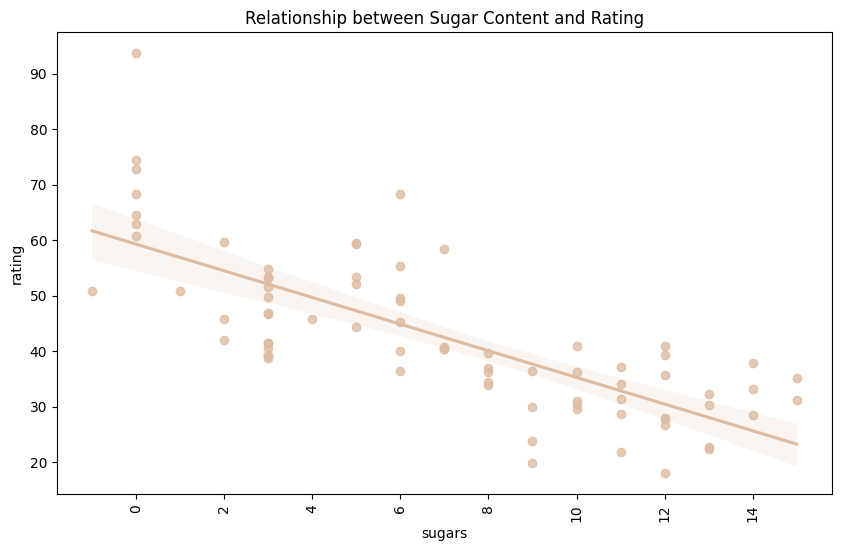

In [44]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=cereals, x=cereals['sugars'], y=cereals['rating'], color='#DEBCA2')

**Insight:**
>
> * A scatterplot where the points tend to cluster around a line that slopes downwards from the top left to the bottom right indicates a negative correlation between the two variables (Sugar vs Rating).
> 
> * The slope of this regression line is negative, indicating that as one variable increases, the other variable tends to decrease.
> 
> * This implies that the consumers may prioritize buying cereals, with low sugar content. 

**Features which will wield the greatest influence on predicting the consumer ratings**

> **Using the Random Forests Regressor to check for Feature Importance**

In [45]:
#Let's drop non numerical features for our X variable 
X = cereals.drop(columns=['name', 'serving_type', 'manufacturer', 'rating','shelf', 'cups', 'weight'])
y = cereals['rating']

#Fit our model
model = RandomForestRegressor()
model.fit(X, y)

#Assign our important features for visualization
feature_importances = model.feature_importances_

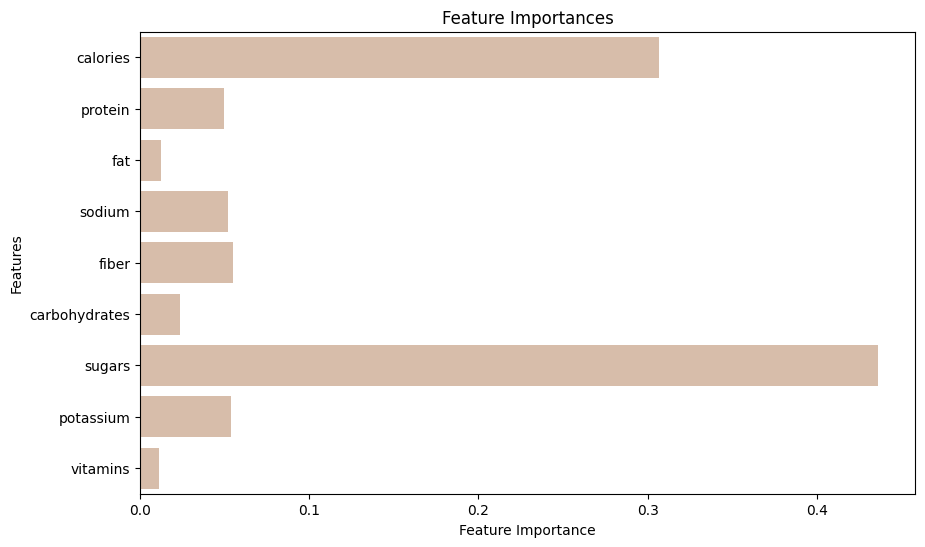

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns,  color='#DEBCA2')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

**Insight:**

> The bar chart showcases sugars and calories as two pivotal factors (predictor variables) contributing to the ability to forecast customer ratings (for a machine learning model.

**Creating a health_score column to rank all the cereals according to how healthy they are, for consumption**

>**Criteria based on multiple sources:**
>
>* calorie < 30g or 55g
>* protein <= 1g or 2g || close to 10 g
>* fat <= 2.5 g
>* sodium <= 140 mg
>* fiber => 3g or 5g
>* carbohydrates
>* sugars < 7g or 6 g
>* potassium < 100 mg
>* vitamins > 0,25,100

In [50]:
df['health_score'] = 0

def nutrition_checker(row):
    
    return_score = 0
    if row['calories'] <= 33:
        return_score+=1
    if row['protein'] <= 2:
          return_score+=1
    if row['fat'] <= 2.5:
        return_score+=2
    if row['sodium'] <= 140:
        return_score+=1
    if row['fiber'] >= 5:
        return_score+=2
    if row['carbohydrates'] < 20:
        return_score+=1
    if row['sugars'] < 6:
        return_score+=2
    if row['potassium'] < 100:
        return_score+=1
    if row['vitamins'] > 0:
        return_score+=1
        
    return return_score

df['health_score'] = df.apply(nutrition_checker, axis=1)

**Which cereals are healthy and which are not?**

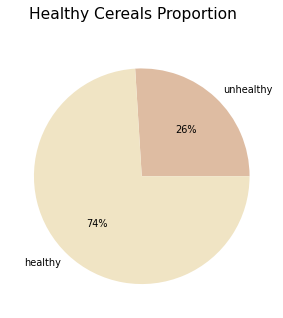

In [52]:
unhealthy_cereals = df['health_score'].loc[df['health_score'] < 6]
unhealthy_count = unhealthy_cereals.count()

healthy_cereals = df['health_score'].loc[df['health_score'] > 5]
healthy_count = healthy_cereals.count()

#create pie chart
fig = plt.figure(figsize=(10,5), dpi=70)
colors = ['#DEBCA2', '#F0E4C4']
fig.suptitle('Healthy Cereals Proportion',fontsize=16)
plt.pie([unhealthy_count,healthy_count], labels = ['unhealthy','healthy'], colors = colors, autopct='%.0f%%')
plt.show()

**Which cereals are the most healthiest regardless of its rating? And which are the most unhealthiest?**

Text(0, 0.5, 'Names')

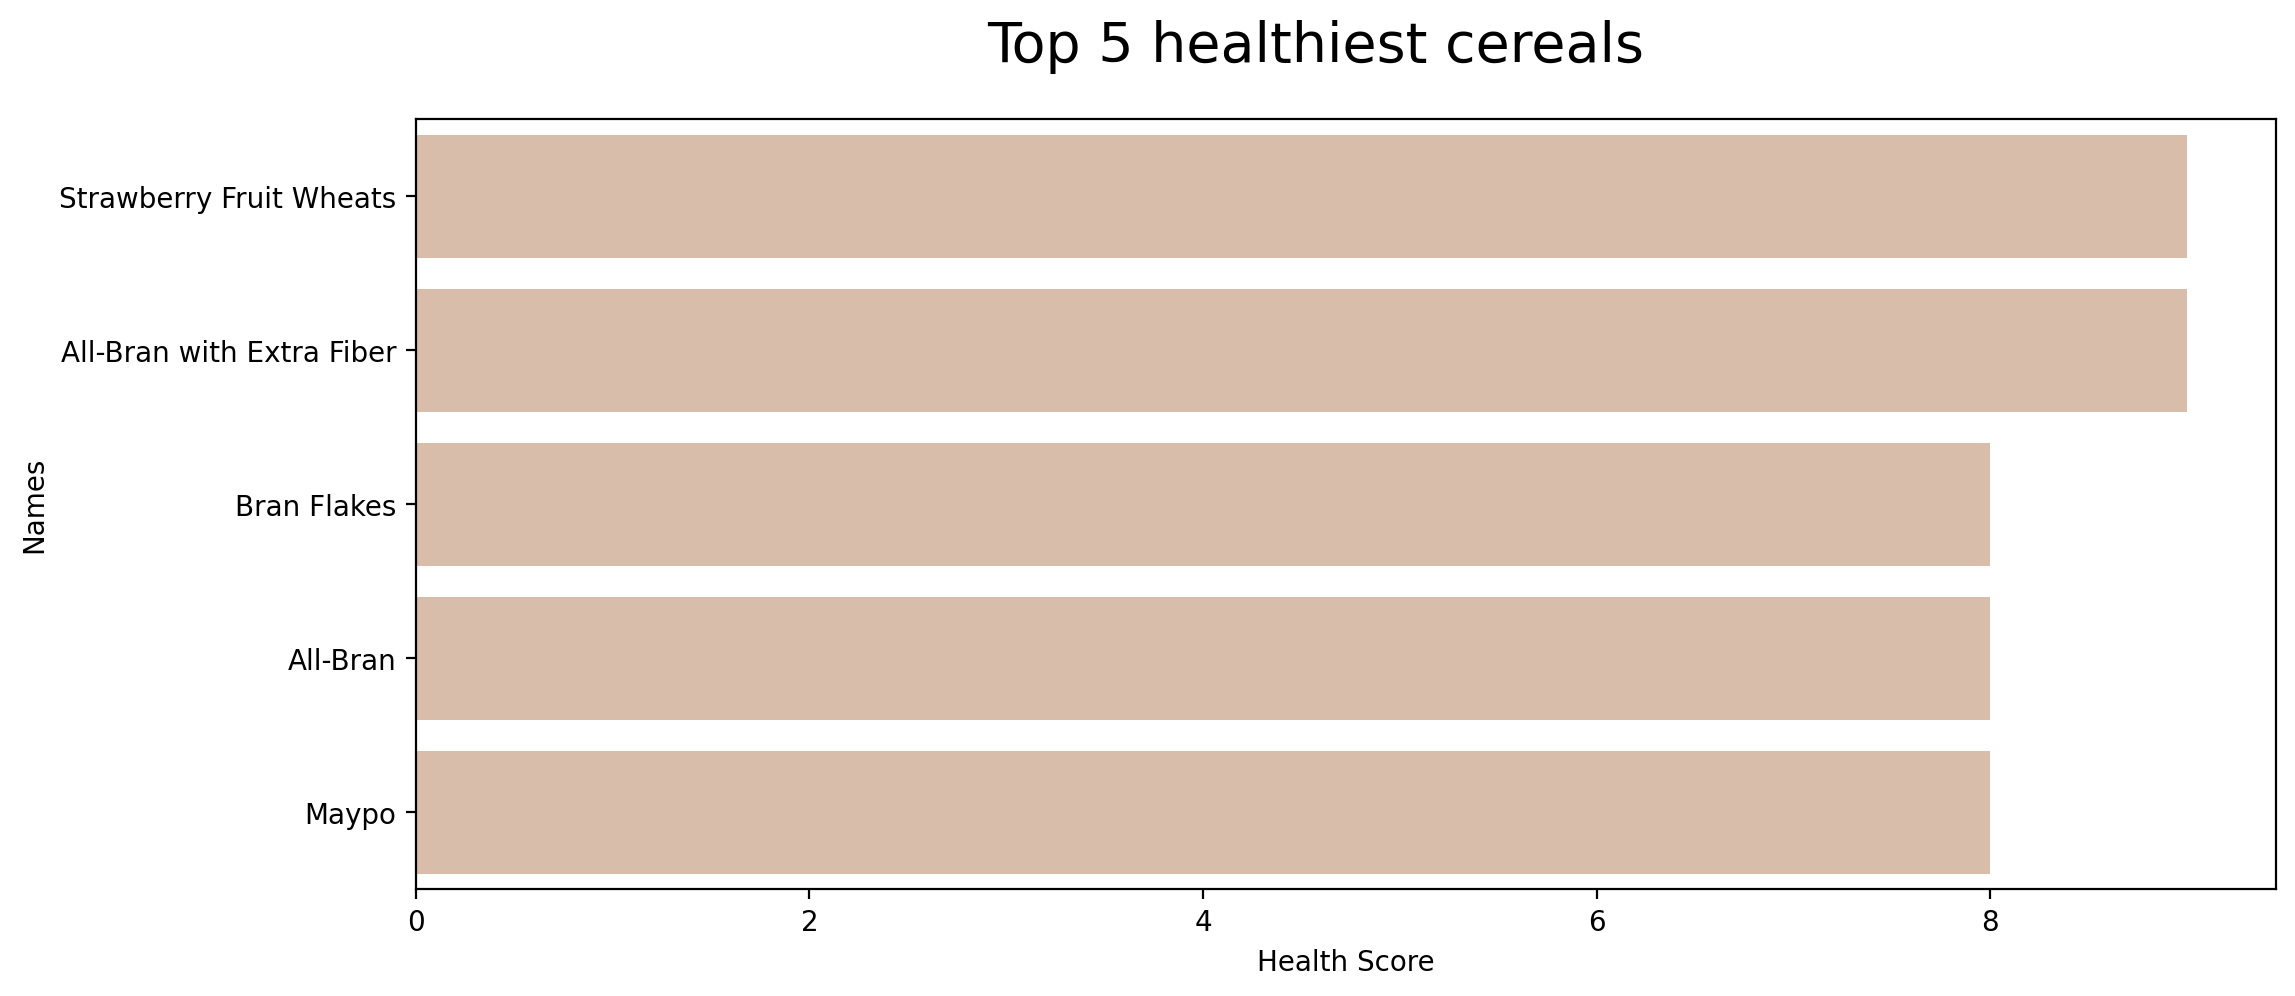

In [53]:
df_healthy = df.sort_values('health_score', ascending=False)
df_healthy = df_healthy.head(5)

fig = plt.figure(figsize=(12,5), dpi=200)
fig.suptitle('Top 5 healthiest cereals',fontsize=20)
plots = sns.barplot(y = df_healthy['name'],x = df_healthy['health_score'], color='#DEBCA2')
plt.xlabel('Health Score')
plt.ylabel('Names')

Text(0, 0.5, 'Names')

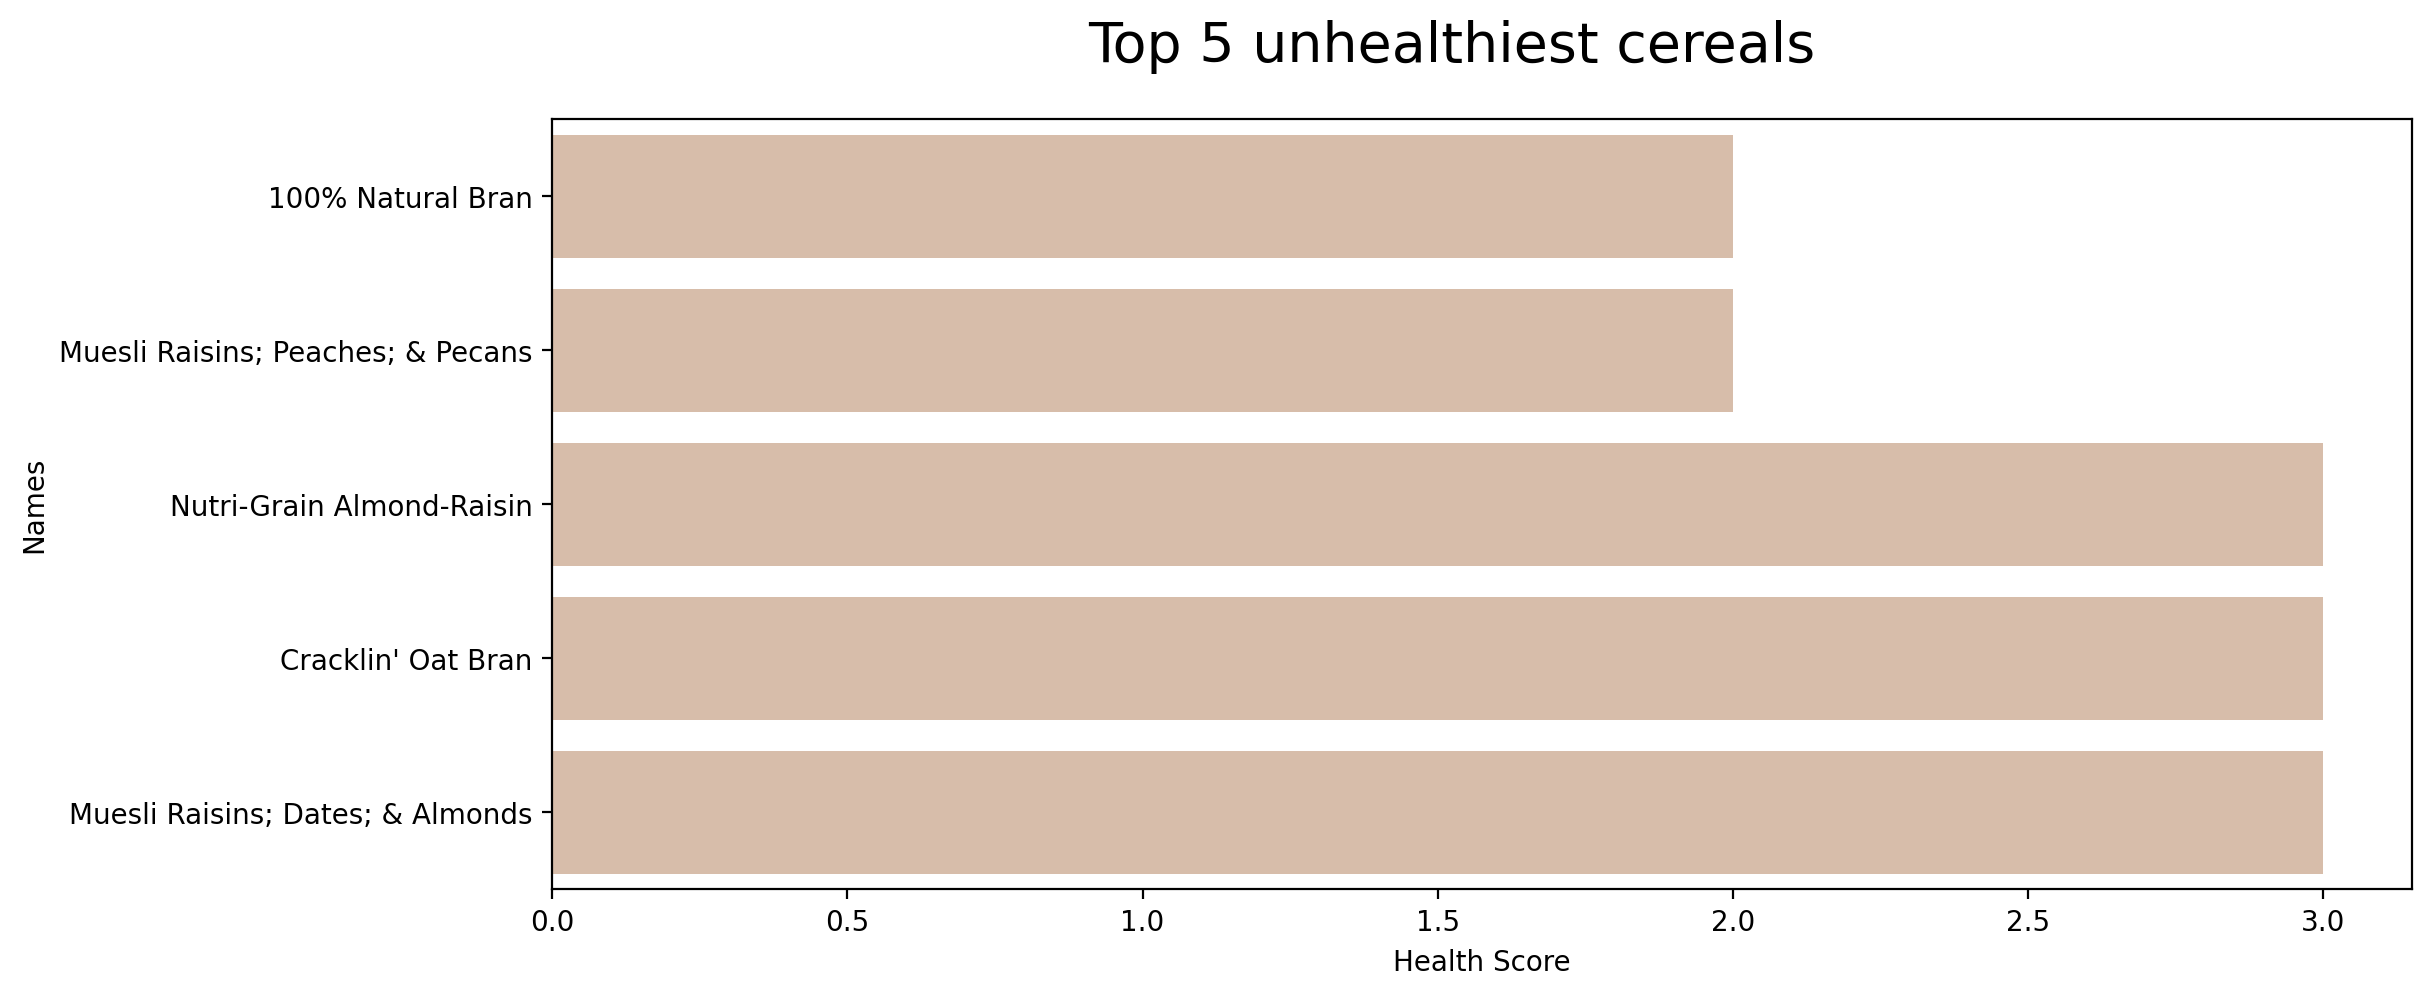

In [54]:
df_unhealthy = df.sort_values('health_score', ascending=True)
df_unhealthy = df_unhealthy.head(5)

fig = plt.figure(figsize=(12,5), dpi=200)
fig.suptitle('Top 5 unhealthiest cereals',fontsize=20)
plots = sns.barplot(y = df_unhealthy['name'],x = df_unhealthy['health_score'], color='#DEBCA2')
plt.xlabel('Health Score')
plt.ylabel('Names')

**Does a cereal having a high rating correlate to being the healthiest cereal in the dataset?**

In [59]:
df_corr = pd.DataFrame()
df_corr['name'] = df['name']
df_corr['rating'] = df['rating']
df_corr['health_score'] = df['health_score']

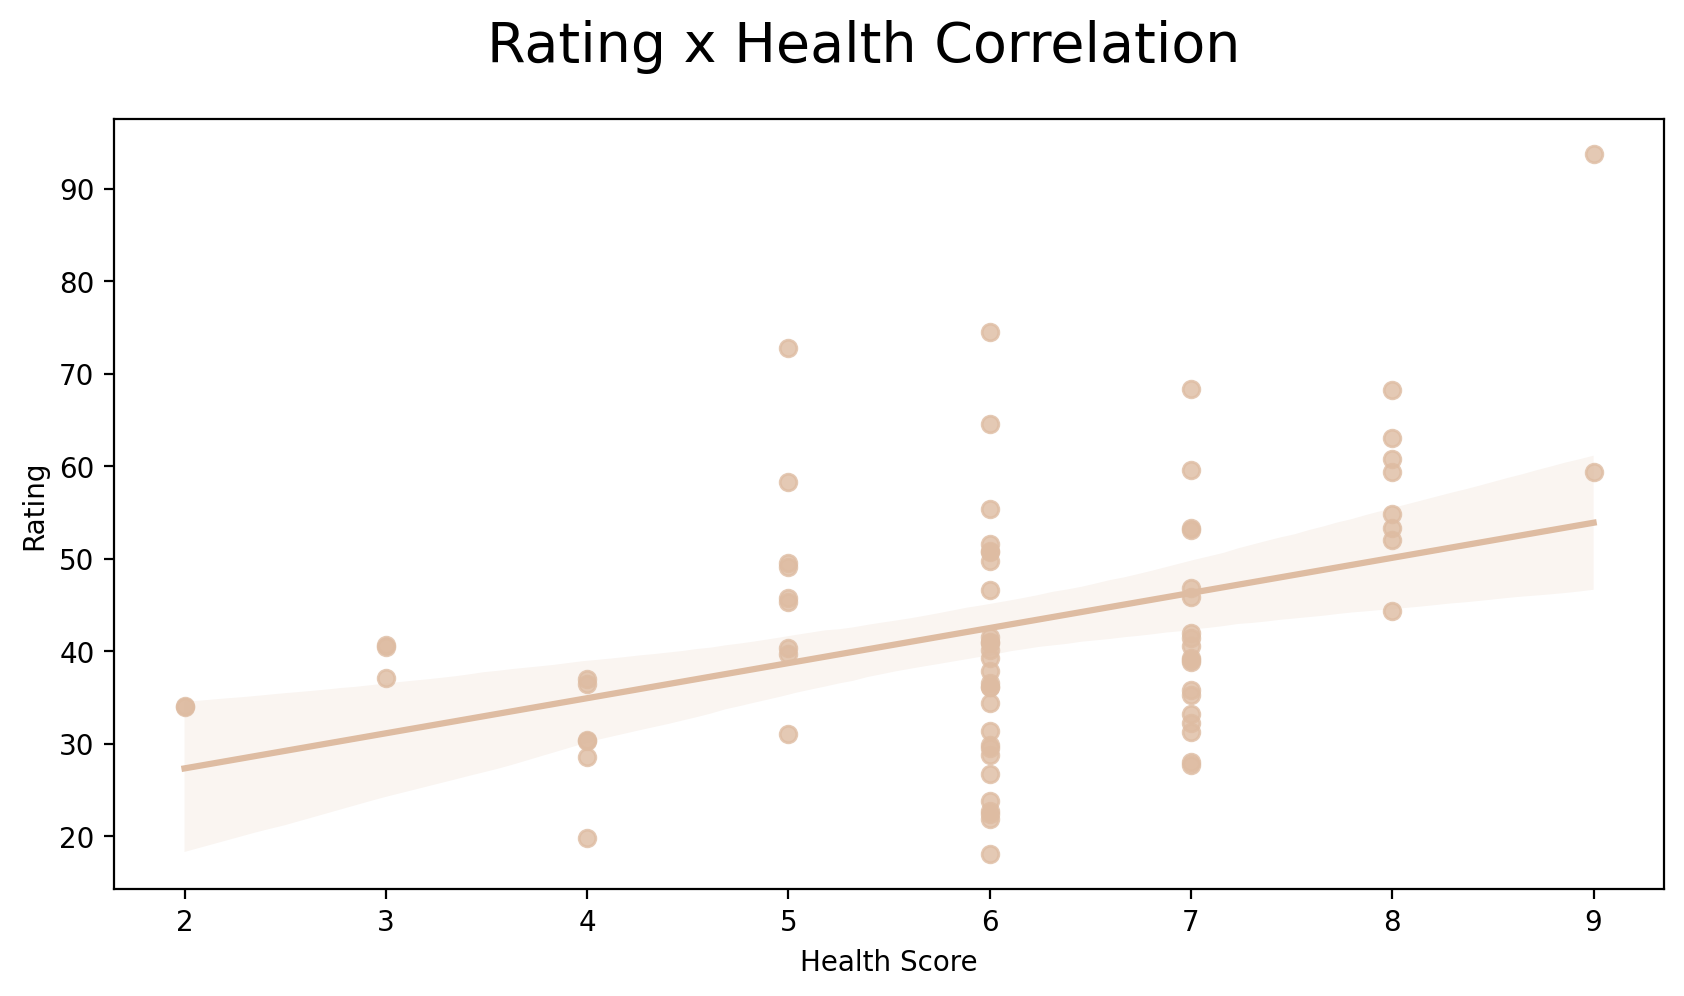

In [60]:
fig = plt.figure(figsize=(10,5), dpi=200)
fig.suptitle('Rating x Health Correlation',fontsize=20)
plots = sns.regplot(x="health_score", y="rating", data=df_corr, color='#DEBCA2');
plt.xlabel('Health Score')
plt.ylabel('Rating')
plt.show()

**Insight:**

> This scatter plot with positive correlation shows that highest rated cereals are indeed the healthiest. 

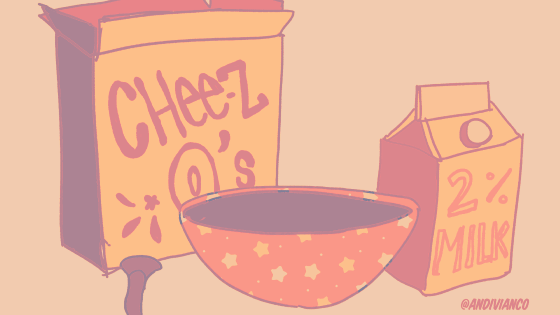